requirements:
1. Remember to include the names and KU user names (login for KUnet) for all group members in the solution.
2. In detail you must demonstrate that you can implement, perform and evaluate: (please refer to individual questions)
3. your answer should include a pdf-file (Max 5 pages of text including figures and tables) describing your solution and showing examples of well-chosen image results. (Do NOT include your source code in this PDF file.)
4. In addition you should include your code as a zip-file. (RAR is not allowed)
5. When using software from any library please state which routines were applied when and from which library. Also specify parameter settings etc.



# 1 Gaussian filtering. Show the result using σ = 1, 2, 4, 8 pixels and explain in detail what can be seen.



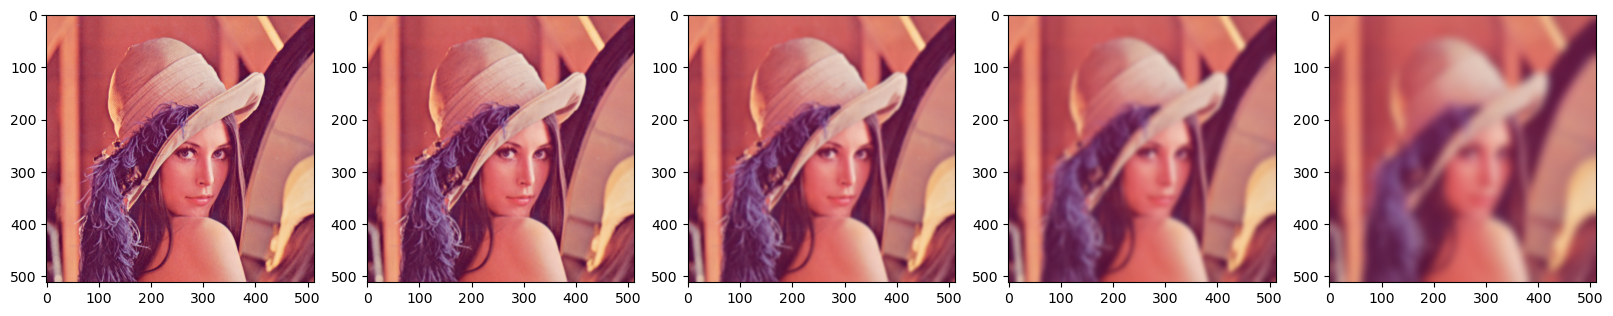

In [1]:
'''
Thing should be noticed before using OpenCV
1. By default, the image is saved in the BGR color space. (cv2.imread)
2. Functions of OpenCV is data type sensitive. You cannot pass int to a function that computes on float32. 
3. OpenCV always support uint8 and int8, but not other datatypes.
4. If not using OpenCV, always convert image datatype to int64 or float. Because int8 is not wide enough.
5. It's always annoying to figure out which datatype to use when working with OpenCV. Different functions have different requirements. 
'''

import cv2 
import matplotlib.pyplot as plt
# By default, the image is saved in the BGR color space.
# https://www.geeksforgeeks.org/python-opencv-cv2-imread-method/
img = cv2.imread('Lenna.png')
# img = cv2.imread('camera.png')
img = img[:, :, [2, 1, 0]] # change from BGR to RGB
gray_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # Only support int8 or uint8
img_float_point = img / 255

# img = img_float_point
fig, ax = plt.subplots(1, 5)
ax[0].imshow(img)
fig.set_size_inches(20, 60)
sigmas = [1, 2, 4, 8]
for i, sigma in enumerate(sigmas):
    # https://www.tutorialkart.com/opencv/python/opencv-python-gaussian-image-smoothing/#gsc.tab=0 
    # https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html
    # the filter size may be truncated to a finite size at about ±3.0σ along each dimension.
    result = cv2.GaussianBlur(img_float_point,(sigma * 6 + 1, sigma * 6 + 1), sigmaX=sigma, sigmaY=sigma)
    # result = cv2.GaussianBlur(img, (0, 0), sigmaX=sigma, sigmaY=sigma)
    ax[i + 1].imshow(result)





Analysis:
1. As the increasing og lambda and kernel size, the image gets more blurred and more details are removed.  
2. Filtering is a good way to blur images.  
3. The effect of Gaussian filtering looks like changing camera focus.   

2 Gradient magnitude computation using Gaussian derivatives. Use σ =
1, 2, 4, 8 pixels, and explain in detail what can be seen and how the results
differ.

the gradient magnitude 是指梯度的大小。这道题是叫我们计算梯度大小。  
思路是，先计算x和y的导数，然后用求向量模长的方法求解就行。


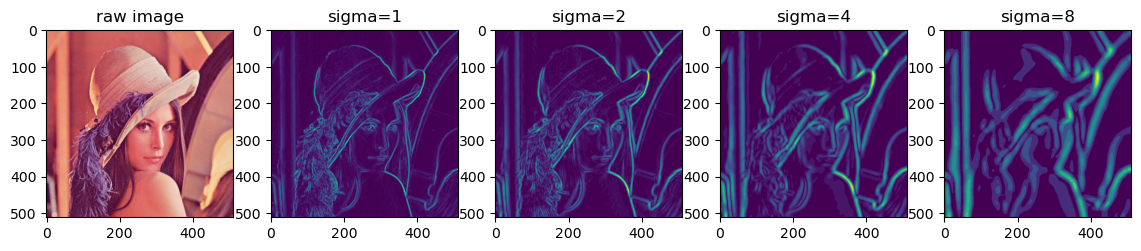

In [6]:
#From Yan Zhang
from scipy import ndimage
source_image = gray_image.astype('int64')
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_gradient_magnitude.html#scipy.ndimage.gaussian_gradient_magnitude
fig, ax = plt.subplots(1, len(sigmas) + 1)
ax[0].imshow(img)
ax[0].set_title('raw image')
fig.set_size_inches(14, 7)
# compute gradient magnitude
# gray_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # Only support int8 or uint8
for i, sigma in enumerate(sigmas):
    # using float point image, filtering in every channel
    magnitude = ndimage.gaussian_gradient_magnitude(source_image, sigma=sigma)
    ax[i + 1].imshow(magnitude)
    ax[i + 1].set_title(f'sigma={sigma}')

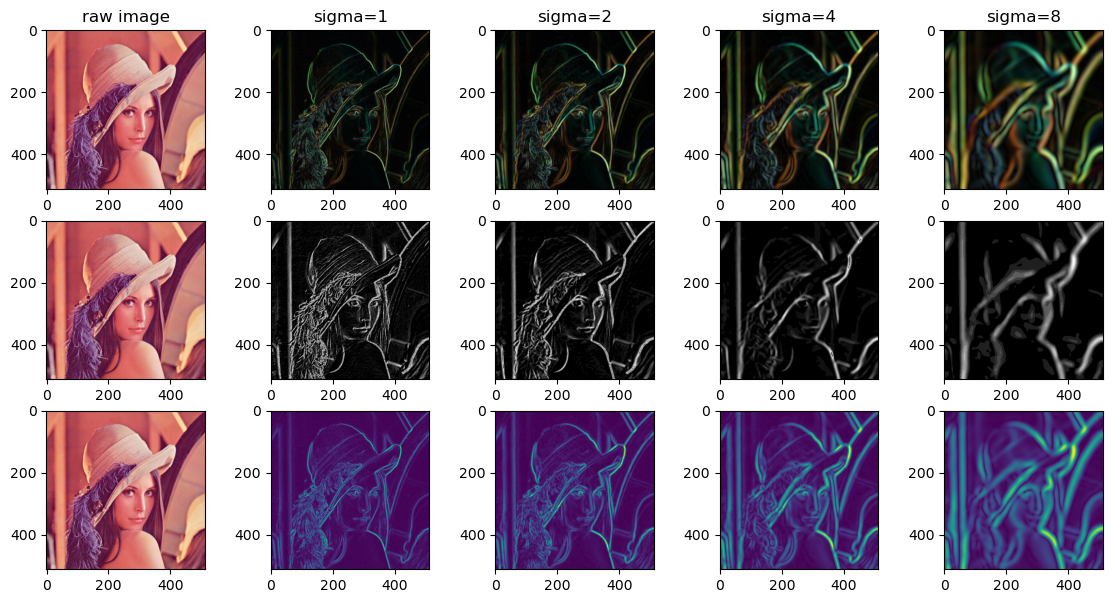

In [8]:
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import get_test_data

# Define Gaussian function and its partial derivatives
# https://hannibunny.github.io/orbook/preprocessing/04gaussianDerivatives.html
def gaussian_2d(x, y, sigma):
    return 1 / (2 * np.pi * sigma ** 2) * np.exp(-1 * (x*x + y*y) / (2 * sigma ** 2))
def x_partial_derivative_g2d(x, y, sigma):
    return -1 * x / (sigma ** 2) * gaussian_2d(x, y, sigma)
def y_partial_derivative_g2d(x, y, sigma):
    return -1 * y / (sigma ** 2) * gaussian_2d(x, y, sigma)
'''
# Validate those three functions
# https://matplotlib.org/stable/gallery/mplot3d/subplot3d.html#sphx-glr-gallery-mplot3d-subplot3d-py 
x = np.linspace(sigma * -3, sigma * 3, 100)
y = np.linspace(sigma * -3, sigma * 3, 100)
x, y = np.meshgrid(x, y)
z = gaussian_2d(x, y, sigma)
z = x_partial_derivative_g2d(x, y, sigma)
z = y_partial_derivative_g2d(x, y, sigma)
# Plot 3D surface 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
'''
def compute_magnitude(image, sigma):
    # return gradient magnitude
    
    # Compute x-derivative 
    # https://hannibunny.github.io/orbook/preprocessing/04gaussianDerivatives.html
    x = np.arange(sigma * -3, sigma * 3 + 1, 1)
    y = x.copy()
    # np.meshgrid() generates mesh grid coordinates given x range and y range. Here we take the mesh grid as a kernel.  
    x, y = np.meshgrid(x, y) 
    x_derivative_kernel = x_partial_derivative_g2d(x, y, sigma)
    y_derivative_kernel = y_partial_derivative_g2d(x, y, sigma)
    # Filtering. OpenCV provides a function, cv2.filter2D(), to convolve a kernel with an image. 
    # The second parameter -1 indicates that the data type of the destination image remains as the data type as the source image.
    # https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04
    x_edge = cv2.filter2D(image,-1, x_derivative_kernel) # support float in [0,1] and int8 and uint8
    y_edge = cv2.filter2D(image,-1, y_derivative_kernel)
    return np.sqrt(x_edge * x_edge + y_edge * y_edge) # Compute gradient magnitude

fig, ax = plt.subplots(3, len(sigmas) + 1)
ax[0, 0].imshow(img)
ax[0, 0].set_title('raw image')
ax[1, 0].imshow(img)
ax[2, 0].imshow(img)
fig.set_size_inches(14, 7)
# compute gradient magnitude
# gray_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # Only support int8 or uint8
for i, sigma in enumerate(sigmas):
    # using float point image, filtering in every channel
    magnitude = compute_magnitude(img_float_point, sigma)
    # min-max normalization
    magnitude = (magnitude - np.min(magnitude)) / (np.max(magnitude) - np.min(magnitude))
    ax[0, i + 1].imshow(magnitude)
    ax[0, i + 1].set_title(f'sigma={sigma}')

    # using gray scale image
    magnitude = compute_magnitude(gray_image, sigma)
    magnitude = (magnitude - np.min(magnitude)) / (np.max(magnitude) - np.min(magnitude))
    ax[1, i + 1].imshow(magnitude, cmap='gray')
    
    # showing 'hot map'
    magnitude = compute_magnitude(gray_image / 255, sigma)
    magnitude = (magnitude - np.min(magnitude)) / (np.max(magnitude) - np.min(magnitude))
    ax[2, i + 1].imshow(magnitude)

ax[2, 0].imshow(img)

Analysis:
1. Using Gaussian derivative as a filter can extract edges from a picture.
2. With the increasement of σ and kernel size, micro edges are gone, and sharp edges remain. Also, edges get blurred.
3. The difference of element datatype can results in different edge detection effects.

3 Laplacian-Gaussian filtering. You may implement this as a difference of
Gaussians. Again, use σ = 1, 2, 4, 8 pixels, and explain in detail what can
be seen and how the results differ.

构建DoG：取任意k属于(1, 2)，计算B和σ2，得到两个高斯分布；将两个高斯分布做减法，得到DoG。  
用DoG构建卷积核。  
将卷积核应用于图像。  
分析结果。  

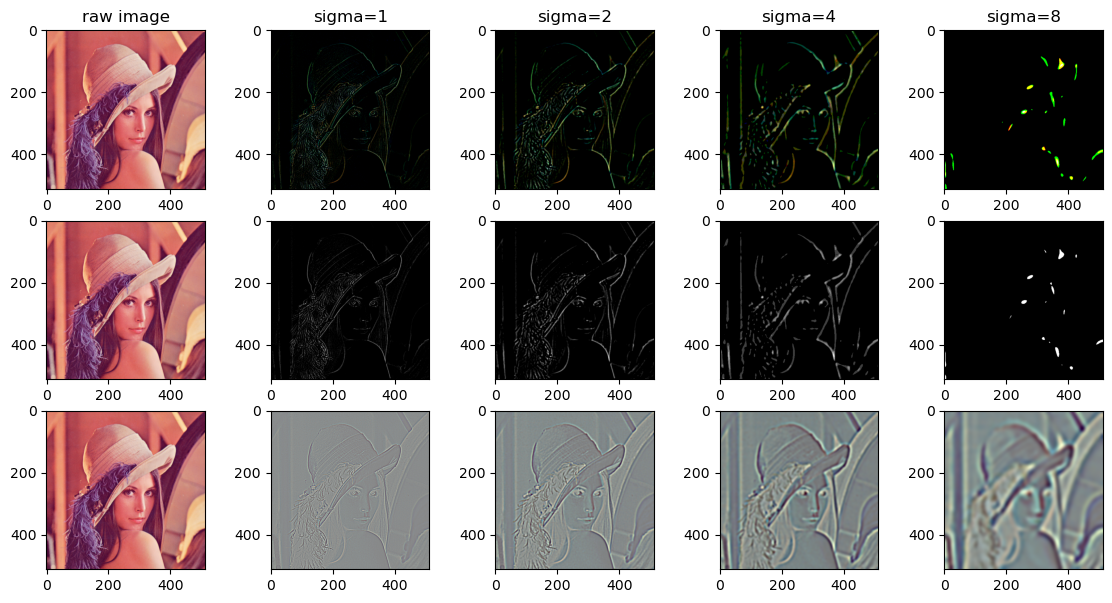

In [ ]:
def get_dog_kernel(sigma, k = 1.5):
    # Return a kernel of difference of Gaussian function. 
    sigma_1 = np.sqrt(sigma**2 * (k**2 - 1) / (k**2 * np.log(k**2)))
    B = 2 * sigma_1**2 / sigma**4 * k**2 / (1 - k**2)
    x = np.arange(sigma * -3, sigma * 3 + 1, 1)
    y = x.copy()
    x, y = np.meshgrid(x, y) 
    return B*(gaussian_2d(x, y, sigma_1) - gaussian_2d(x, y, k*sigma_1))

fig, ax = plt.subplots(3, len(sigmas) + 1)
ax[0, 0].imshow(img)
ax[0, 0].set_title('raw image')
ax[1, 0].imshow(img)
ax[2, 0].imshow(img)
fig.set_size_inches(14, 7)
# compute gradient magnitude
# gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
for i, sigma in enumerate(sigmas):
    # using float point image, filtering in every channel
    dog_edge = cv2.filter2D(img,-1, get_dog_kernel(sigma))
    dog_edge = (dog_edge - np.min(dog_edge)) / (np.max(dog_edge) - np.min(dog_edge))
    ax[0, i + 1].imshow(dog_edge)
    ax[0, i + 1].set_title(f'sigma={sigma}')
    # using gray scale image
    # gray_image_64 = gray_image.astype('int64')
    dog_edge = cv2.filter2D(gray_image,-1, get_dog_kernel(sigma))
    dog_edge = (dog_edge - np.min(dog_edge)) / (np.max(dog_edge) - np.min(dog_edge))
    ax[1, i + 1].imshow(dog_edge, cmap='gray')
    
    dog_edge = cv2.filter2D(img_float_point,-1, get_dog_kernel(sigma))
    dog_edge = (dog_edge - np.min(dog_edge)) / (np.max(dog_edge) - np.min(dog_edge))
    # showing hot map
    ax[2, i + 1].imshow(dog_edge)


Analysis:
1. The result is less detailed than that of first order derivative filters.
2. When σ equals to 8, there are almost not edges remained, only some spots. 

4 Canny (or similar) edge detection. Describe the parameter values and their
impact on the result. Select what you think is a set of good parameter
values, apply, show and decribe the result.

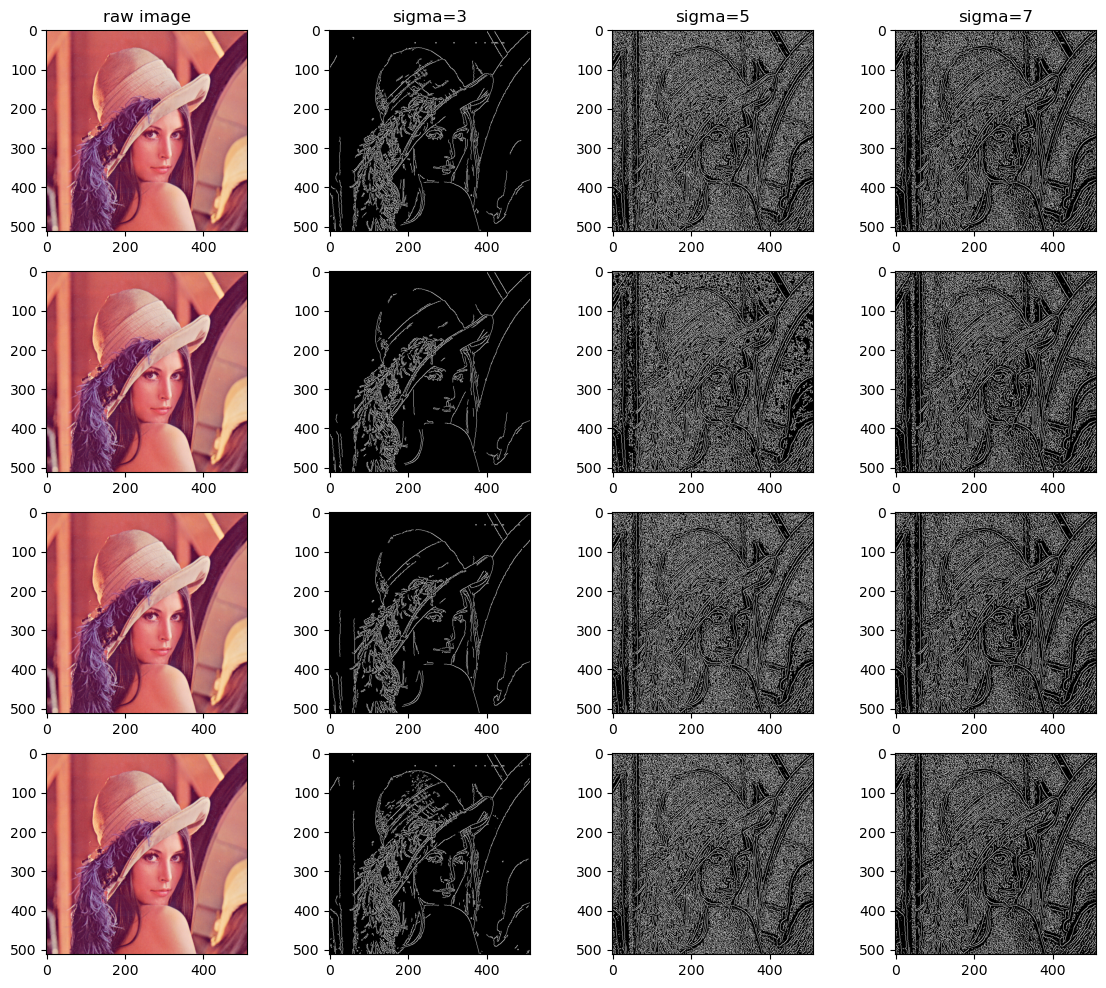

In [ ]:
# https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html
import cv2
import numpy as np
from matplotlib import pyplot as plt

fig, ax = plt.subplots(4, 4)
ax[0, 0].imshow(img)
ax[0, 0].set_title('raw image')
ax[1, 0].imshow(img)
ax[2, 0].imshow(img)
ax[3, 0].imshow(img)
fig.set_size_inches(14, 12)
# gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert the RGB image into a gray image
for i, kernel_size in enumerate([3, 5, 7]): # Aperture size should be odd between 3 and 7 in function 'Canny'
    # 1. Second and third arguments are our minVal and maxVal respectively. They are used for thresholding. 
    # 2. ApertureSize is the Sobel kernel size, used for computing x-derivative and y-derivative.
    # 3. L2gradient is a flag, when L2gradient is True, the function use L^2-Norm to compute magnitude. 
    # When it is False, is use equation G = |Gx| + |Gy| for computing magnitude.

    # Computing in three channels
    edges = cv2.Canny(img, 100 , 200, apertureSize = kernel_size, L2gradient=False) # Canny only support uint8
    ax[0, i + 1].imshow(edges, cmap='gray')
    ax[0, i + 1].set_title(f'sigma={kernel_size}')
    # Computing in gray scale
    edges = cv2.Canny(gray_image, 100 , 200, apertureSize = kernel_size, L2gradient=False)
    ax[1, i + 1].imshow(edges, cmap='gray')
    # Using L^2-Norm for computing magnitude 
    edges = cv2.Canny(img, 100 , 200, apertureSize = kernel_size, L2gradient=True)
    ax[2, i + 1].imshow(edges, cmap='gray')
    # saving more “sure-edge” pixels
    edges = cv2.Canny(img, 100 , 150, apertureSize = kernel_size, L2gradient=False)
    ax[3, i + 1].imshow(edges, cmap='gray')

Analysis:
1. The best kernel size is (3x3). If the size is larger than 3, noise could be introduced.
2. If we use three channels for computing, there might be more blobs in the result image.
3. If we use gray image for edge detection, some edges will be ignored.
4. The smaller the 'sure-edge' threshold is, the more edges and blobs will be detected.

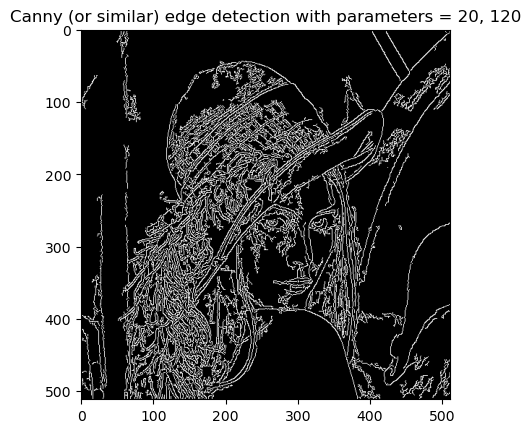

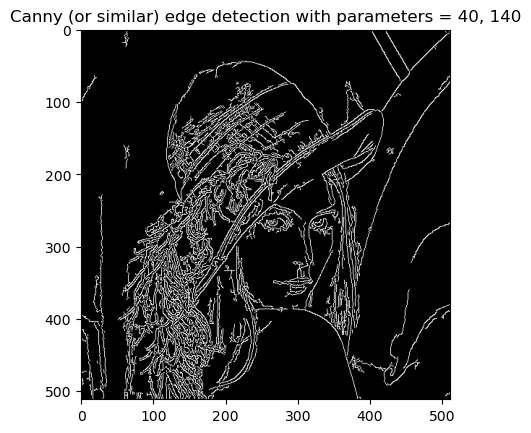

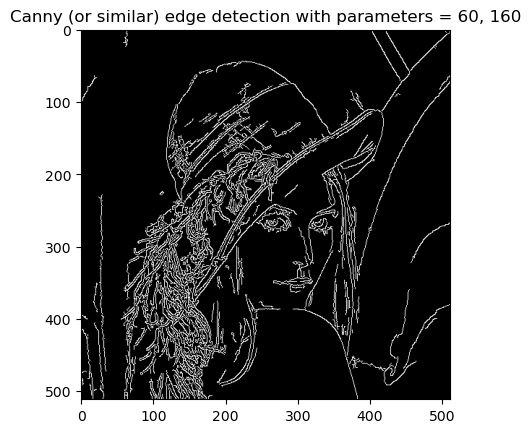

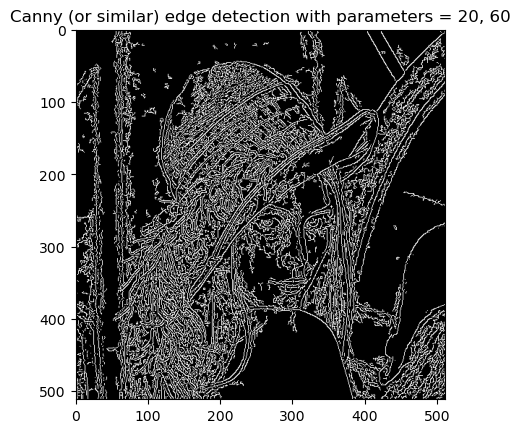

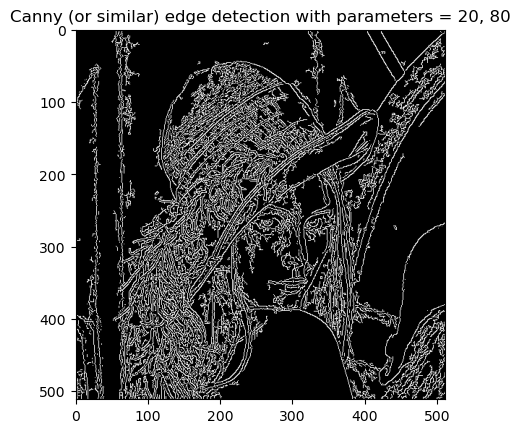

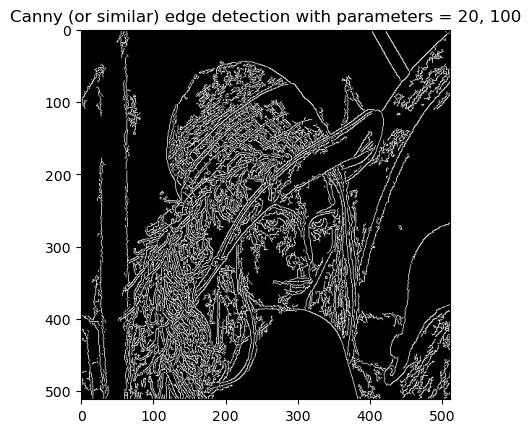

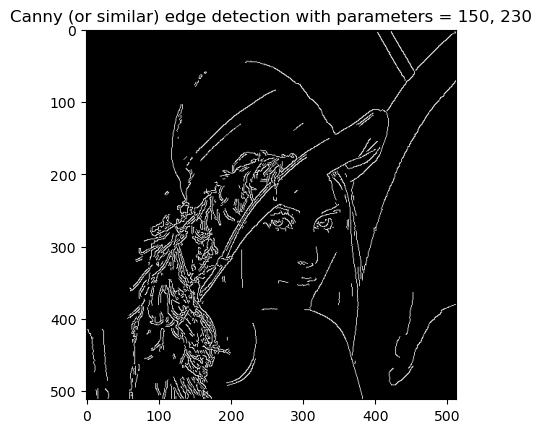

In [ ]:
#4. From Yan Zhang
def canny(image,threshold1,threshold2):
    edges = cv2.Canny(image, threshold1, threshold2)
    #show image using matplotlib
    plt.imshow(edges, cmap='gray')
    plt.title(f'Canny (or similar) edge detection with parameters = {threshold1}, {threshold2}')
    plt.show()    
   
    
canny(gray_image,20,120)
canny(gray_image,40,140)
canny(gray_image,60,160)
canny(gray_image,20,60)
canny(gray_image,20,80)
canny(gray_image,20,100)